Índex: 

- importar llibreries i definir funcions auxiliars

Definició de capses: 
- definir el volum
- definir irr i concentració de Nd de cada capsa (condicions inicials, partint de 0)
- definir els fluxos entre capses
- transformar irr (de cada capsa) a Nd_143 i Nd_144
- afegir temps residència i reminalització

Definició de fluxos externs:
- afegir els fluxos d'entrada (rius, nil, atlàntic, mediterrani),
- transformació dels fluxos en Nd_143 i Nd_144

BE 
- Afegir els paràmetres dels BE 
- Transofomar els paràmetres en Nd_143 i Nd_144

Equació
- Definir la funció
- Resolució de la funció
- Gràfics

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
scyr = 3.154e7 #segons en un any

In [3]:
#Conversió irr a epsilon
def epsilon (up, down):
    return ((up/down) / 0.512638 - 1) * 10000

In [4]:
#Conversió de irr a epsilon (amb irr)

def epsilon_ind (ratio):
    return((ratio) / 0.512638 - 1) * 10000

In [5]:
#conversió de epsilon a irr

def ratio_isotopic (epsi):
    return ((epsi/10000 + 1) * 0.512638)

In [6]:
#Conversió de f a fl
def flux_matriu(f_matriu):
    return ((f_matriu)/(1e6 * scyr))

In [7]:
# Dada per funcionar flux_marge:

Nd_mol = 144.242 

In [8]:
#Conversió de flux marge a f * 1/Nd_mol * 1e12
def flux_marge(f_marge):
    return((f_marge/((1/Nd_mol)*1e12)))

In [9]:
#Conversió de flux (m3/any) a flux (Sv)
def flux_sv(flux_m3):
    return(flux_m3/(scyr*1000000))

In [10]:
#conversió de flux (sv) a flux (m3/any)
def flux_m3(flux_sv):
    return(flux_sv*1000000*scyr)

In [11]:
# Calcular ratio isotopic inicial amb les dades de literatura:

ratio_dades = [0, 0, 0, 0, 0, 0, 0]

ratio_dades[1] = ratio_isotopic(-6.89)
ratio_dades[2] = ratio_isotopic(-7.02)
ratio_dades[3] = ratio_isotopic(-8.05)
ratio_dades[4] = ratio_isotopic(-8.93)
ratio_dades[5] = ratio_isotopic(-8.31)
ratio_dades[6] = ratio_isotopic(-8.69)

ratio_dades

[0,
 0.512284792418,
 0.5122781281240001,
 0.5122253264100001,
 0.512180214266,
 0.512211997822,
 0.512192517578]

In [12]:
v = [0, 1.6e15, 4.7e14, 5.2e13, 4.2e13, 3.8e14, 1.3e15] #volum de les capses (m3)
irr = [0, 0.512284792418, 0.5122781281240001, 0.5122253264100001, 0.512180214266, 0.512211997822, 0.512192517578] #ratios entre nd143/nd144
c = [0, 0, 0, 0, 0, 0, 0] #concentracions neodimi pmol/m3

In [13]:
# Concentracions d'equilibri

 #25.205453485902293,
 #26.118052588744767,
 #29.04736107189415,
 #23.107394202389965,
 #25.49500191437809,
 #21.849920205806452

In [14]:
# Epsilon equilibri

 #-6.709116276354399,
 #-6.837459843775928,
 #-6.883056738614668,
 #-9.418734683641627,
 #-8.485396025819103,
 #-8.768217683960966


In [15]:
ratio_isotopic(-8.768217683960966)

0.512188507842293

In [16]:
#fluxos (de l'article):

fl = np.array ([[0, 0, 0, 0, 0, 0, 0,], 
               [0, 0, 0.42, 0, 0, 0, 0],
               [0, 0.34, 0, 0.37, 0, 1, 0],
               [0, 0, 1.45, 0, 0, 0, 0],
               [0, 0, 0, 1, 0, 1.58, 0],
               [0, 0, 0, 0, 0.95, 0, 0.76],
               [0, 0, 0, 0, 0, 0.9, 0]])
f = fl * 1e6 * scyr

In [17]:
#conversió de irr a c_143 i c_144 (concentracions de cada isòtop de nd)

#capsa 1
c1_143 = c[1]/(1/irr[1]+1)
c1_144 = c[1]/(irr[1]+1)

#capsa 2
c2_143 = c[2]/(1/irr[2]+1)
c2_144 = c[2]/(irr[2]+1)

#capsa 3
c3_143 = c[3]/(1/irr[3]+1)
c3_144 = c[3]/(irr[3]+1)

#capsa 4 
c4_143 = c[4]/(1/irr[4]+1)
c4_144 = c[4]/(irr[4]+1)

#capsa 5
c5_143 = c[5]/(1/irr[5]+1)
c5_144 = c[5]/(irr[5]+1)

#capsa 6
c6_143 = c[6]/(1/irr[6]+1)
c6_144 = c[6]/(irr[6]+1)

cir = [c1_143, c1_144, c2_143, c2_144, c3_143, c3_144, c4_143, c4_144, c5_143, c5_144, c6_143, c6_144]
#         0       1       2       3       4       5       6       7       8       9      10      11 

In [18]:
tau = [0, 120, 22.5, 5, 2.25, 16, 90] #temps de residència del neodimi (anys)
rem = np.array([[0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0],
                [0, 0.1, 0, 0, 0, 0, 0],
                [0, 0.2, 0.7, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0.1, 0.1], 
                [0, 0, 0, 0, 0, 0, 0.1],
                [0, 0, 0, 0, 0, 0, 0]]) 
                #coeficients de reminalització entre les capses

In [19]:
global tau
global rem
global f
global v
global irr
global c
global scav

In [20]:
#Dades fluxos i concentracions externs

#Atlantic (entrada)
fAtl4 = 1 * 1e6 * scyr   #Flux entrada Atlàntic (Jordá et al 2017)
cAtl = 5 * 1025
irrAtl = 0.512074

#Mediterrani (sortida)
fMOW5 = 0.9 * 1e6 * scyr   # Flux sortida Mediterrani (Jordá et al 2017)
cMOW = 15 * 1025
irrMOW = 0.512228

#Nil
fNdNil = 2.7e17 #pmol/any assumint 1% solubilitat
irrNil = 0.512587

##Rius
#Riu conca oest
fRw4 = 5e6 * scyr
cRw4 = 8.78 * 1025
irrRw = 0.512138 #epsilon = -9.75

#Rius conca est
fRe3 = 3.8e6 * scyr
cRe3 = 2.7 * 1025
irrRe = 0.512330 #epsilon = -6

In [21]:
#Isotops "externs"

# Atlàntic (entrada)
cAtl_143 = cAtl / (1/irrAtl+1)
cAtl_144 = cAtl / (irrAtl+1)

#Mediterrani (sortida)
cMOW_143 = cMOW / (1/irrMOW+1)
cMOW_144 = cMOW / (irrMOW+1)

#Nil
fNil_143 = fNdNil / (1/irrNil+1)
fNil_144 = fNdNil / (irrNil+1)

## Rius
#Riu conca oest
cRw_143 = cRw4 / (1/irrRw+1)
cRw_144 = cRw4 / (irrRw+1)

# Riu conca est
cRe_143 = cRe3 / (1/irrRe+1)
cRe_144 = cRe3 / (irrRe+1)


In [22]:
# Codi per modificar irr:

epsilon_ind(0.512125)

-10.007061513191973

In [23]:
# Boundary fluxes:

Nd_mol = 144.242 

##Marge oest
#Concentració
cW_marge = 5e16   # Arbitari
irrW_marge = 0.512151  # epsilon = -9.5

#flux
fW_flux = 4.33e7 * 1 / Nd_mol * 1e12   # gNd/Yr * 1mol/gNd * 10^12pmol/1mol

##Marge est
#Concentració
cE_marge = 5e16   # Arbitrari
irrE_marge = 0.512304 #(epsilon = -6.5)

#flux
fE_flux = 5.4e7 * 1 / Nd_mol * 1e12  # gNd/Yr * 1mol/gNd * 10^12pmol/1mol

In [24]:
# Isòtps dels boundary fluxes

##Marge oest
#Concentració

#flux
fMargeW_143 = fW_flux / (1 / irrW_marge + 1)
fMargeW_144 = fW_flux / (irrW_marge + 1)

##Marge est
#Concentració

#flux
fMargeE_143 = fE_flux / (1 / irrE_marge + 1)
fMargeE_144 = fE_flux / (irrE_marge + 1)


In [25]:
def dxdt (t, cir):
    res = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] #memoria per guardar els resultats
    
    #capsa 1 (advecció, reminelització, scavenging, boundary exchange)
    res[0] = (f[2][1]*cir[2] - f[1][2]*cir[0]\
             + cir[4]*v[3]/tau[3]*rem[3][1] + cir[2]*v[2]/tau[2]*rem[2][1]\
             - cir[0]*v[1]/tau[1]\
             + (fMargeE_143*v[1] / (v[1]+v[2]+v[3]))) / v[1] #143
    
    res[1] = (f[2][1]*cir[3] - f[1][2]*cir[1]\
             + cir[5]*v[3]/tau[3]*rem[3][1] + cir[3]*v[2]/tau[2]*rem[2][1]\
             - cir[1]*v[1]/tau[1]\
             + (fMargeE_144*v[1] / (v[1]+v[2]+v[3]))) / v[1] #144
    
    #capsa 2 (advecció, reminelització, scavenging, boundary exchange)
    res[2] = (f[3][2]*cir[4] + f[1][2]*cir[0] - f[2][3]*cir[2] - f[2][1]*cir[2] - f[2][5]*cir[2] +\
              cir[4]*v[3]/tau[3]*rem[3][2]\
              - cir[2]*v[2]/tau[2]\
              + (fMargeE_143*v[2] / (v[1]+v[2]+v[3]))) / v[2] #143
    
    res[3] = (f[3][2]*cir[5] + f[1][2]*cir[1] - f[2][3]*cir[3] - f[2][1]*cir[3] - f[2][5]*cir[3] +\
              cir[5]*v[3]/tau[3]*rem[3][2]\
              - cir[3]*v[2]/tau[2]\
              + (fMargeE_144*v[2] / (v[1]+v[2]+v[3]))) / v[2] #144
    
    #capsa 3 (advecció, scavening, Nil, rius conca est, boundary exchage)
    res[4] = (f[2][3]*cir[2] + f[4][3]*cir[6] - f[3][2]*cir[4]\
              - cir[4]*v[3]/tau[3]\
              + fNil_143\
              + cRe_143*fRe3\
              + (fMargeE_143*v[3] / (v[1]+v[2]+v[3]))) / v[3] #143
    
    res[5] = (f[2][3]*cir[3] + f[4][3]*cir[7] - f[3][2]*cir[5]\
              - cir[5]*v[3]/tau[3]\
              + fNil_144\
              + cRe_144*fRe3\
              + (fMargeE_144*v[3] / (v[1]+v[2]+v[3]))) / v[3] #144
    
    #capsa 4 (advecció, scavenging, entrada Atlàntic, rius conca oest, boundary exchange)
    res[6] = (f[5][4]*cir[8] - f[4][5]*cir[6] - f[4][3]*cir[6]\
             - cir[6]*v[4]/tau[4]\
             + fAtl4*cAtl_143\
             + cRw_143*fRw4\
             + (fMargeW_143*v[4] / (v[4]+v[5]+v[6]))) / v[4] #143
    
    res[7] = (f[5][4]*cir[9] - f[4][5]*cir[7] - f[4][3]*cir[7]\
             - cir[7]*v[4]/tau[4]\
             + fAtl4*cAtl_144\
             + cRw_144*fRw4\
             + (fMargeW_144*v[4] / (v[4]+v[5]+v[6]))) / v[4] #144
    
    #capsa 5 (advecció, reminelització, scavenging, sortida Mediterrani, boundary exchange).
    res[8] = (f[4][5]*cir[6] + f[6][5]*cir[10] + f[2][5]*cir[2] - f[5][4]*cir[8] - f[5][6]*cir[8]\
              + cir[6]*v[4]/tau[4] * rem[4][5]\
              - cir[8]*v[5]/tau[5]\
              - fMOW5*cir[8]\
              + (fMargeW_143*v[5] / (v[4]+v[5]+v[6]))) / v[5] #143
    
    res[9] = (f[4][5]*cir[7] + f[6][5]*cir[11] + f[2][5]*cir[3] - f[5][4]*cir[9] - f[5][6]*cir[9]\
              + cir[7]*v[4]/tau[4] * rem[4][5]\
              - cir[9]*v[5]/tau[5]\
              - fMOW5*cir[9]\
              + (fMargeW_144*v[5] / (v[4]+v[5]+v[6]))) / v[5] #144

    #capsa 6 (advecció, reminelització, scavenging, boundary exchange)
    res[10] = (f[5][6]*cir[8] - f[6][5]*cir[10]\
              + cir[6]*v[4]/tau[4]*rem[4][6] + cir[8]*v[5]/tau[5]*rem[5][6]\
              - cir[10]*v[6]/tau[6]\
              + (fMargeW_143*v[6] / (v[4]+v[5]+v[6]))) / v[6] #143
    
    res[11] = (f[5][6]*cir[9] - f[6][5]*cir[11]\
              + cir[7]*v[4]/tau[4]*rem[4][6] + cir[9]*v[5]/tau[5]*rem[5][6]\
              - cir[11]*v[6]/tau[6]\
              + (fMargeW_144*v[6] / (v[4]+v[5]+v[6]))) / v[6] #143
    
    return res
    

In [26]:
#cold boot (valors inicials)

c0 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [27]:
solution = solve_ivp(dxdt, [0, 500], c0)

In [28]:
time = solution.t
IR_sol_1 = solution.y[0]/solution.y[1]
IR_sol_2 = solution.y[2]/solution.y[3]
IR_sol_3 = solution.y[4]/solution.y[5]
IR_sol_4 = solution.y[6]/solution.y[7]
IR_sol_5 = solution.y[8]/solution.y[9]
IR_sol_6 = solution.y[10]/solution.y[11]

<ipython-input-28-739a389e811f>:2: RuntimeWarning: invalid value encountered in true_divide
  IR_sol_1 = solution.y[0]/solution.y[1]
<ipython-input-28-739a389e811f>:3: RuntimeWarning: invalid value encountered in true_divide
  IR_sol_2 = solution.y[2]/solution.y[3]
<ipython-input-28-739a389e811f>:4: RuntimeWarning: invalid value encountered in true_divide
  IR_sol_3 = solution.y[4]/solution.y[5]
<ipython-input-28-739a389e811f>:5: RuntimeWarning: invalid value encountered in true_divide
  IR_sol_4 = solution.y[6]/solution.y[7]
<ipython-input-28-739a389e811f>:6: RuntimeWarning: invalid value encountered in true_divide
  IR_sol_5 = solution.y[8]/solution.y[9]
<ipython-input-28-739a389e811f>:7: RuntimeWarning: invalid value encountered in true_divide
  IR_sol_6 = solution.y[10]/solution.y[11]


In [29]:
time = solution.t
epsilon1 = epsilon(solution.y[0], solution.y[1])
epsilon2 = epsilon(solution.y[2], solution.y[3])
epsilon3 = epsilon(solution.y[4], solution.y[5])
epsilon4 = epsilon(solution.y[6], solution.y[7])
epsilon5 = epsilon(solution.y[8], solution.y[9])
epsilon6 = epsilon(solution.y[10], solution.y[11])

<ipython-input-3-abaf312232ae>:3: RuntimeWarning: invalid value encountered in true_divide
  return ((up/down) / 0.512638 - 1) * 10000


Text(0, 0.5, 'Ràtio isotòpic (unitats èpsilon)')

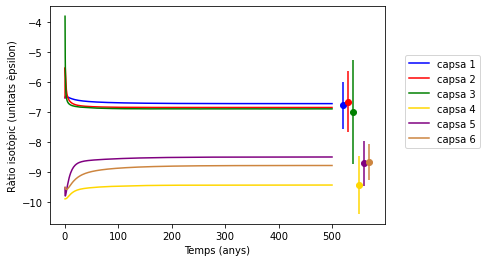

In [30]:
plt.plot(time, epsilon1, label="capsa 1", color="blue")
plt.scatter(520, -6.77, color ="blue") #1
plt.errorbar(520, -6.77, yerr=(0.78), color="blue") #1

plt.plot(time, epsilon2, label="capsa 2", color="red")
plt.scatter(530, -6.64, color="red") #2
plt.errorbar(530, -6.64, yerr=(1.02), color="red") #2

plt.plot(time, epsilon3, label="capsa 3", color="green")
plt.scatter(540, -7.00, color="green") #3
plt.errorbar(540, -7.00, yerr=(1.73), color="green") #3

plt.plot(time, epsilon4, label="capsa 4", color="gold")
plt.scatter (550, -9.42, color="gold") #4
plt.errorbar (550, -9.42, yerr=(0.96), color="gold") #4

plt.plot(time, epsilon5, label="capsa 5", color="purple")
plt.scatter (560, -8.69, color="purple") #5
plt.errorbar(560, -8.69, yerr=(0.75), color="purple") #5 

plt.plot(time, epsilon6, label="capsa 6", color="peru")
plt.scatter(570, -8.64, color="peru") #6
plt.errorbar (570, -8.64, yerr=(0.60), color="peru") #6

plt.legend(bbox_to_anchor=(1.3,0.8))
plt.xlabel("Temps (anys)")
plt.ylabel("Ràtio isotòpic (unitats èpsilon)")

(-5.0, -10.5)

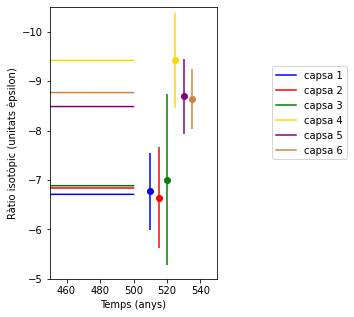

In [31]:
#Ampliació dels marges d'error

plt.figure(figsize=(3,5))
plt.plot(time, epsilon1, label="capsa 1", color="blue")
plt.scatter(510, -6.77, color ="blue") #1
plt.errorbar(510, -6.77, yerr=(0.78), color="blue") #1

plt.plot(time, epsilon2, label="capsa 2", color="red")
plt.scatter(515, -6.64, color="red") #2
plt.errorbar(515, -6.64, yerr=(1.02), color="red") #2

plt.plot(time, epsilon3, label="capsa 3", color="green")
plt.scatter(520, -7.00, color="green") #3
plt.errorbar(520, -7.00, yerr=(1.73), color="green") #3

plt.plot(time, epsilon4, label="capsa 4", color="gold")
plt.scatter (525, -9.42, color="gold") #4
plt.errorbar (525, -9.42, yerr=(0.96), color="gold") #4

plt.plot(time, epsilon5, label="capsa 5", color="purple")
plt.scatter (530, -8.69, color="purple") #5
plt.errorbar(530, -8.69, yerr=(0.75), color="purple") #5 

plt.plot(time, epsilon6, label="capsa 6", color="peru")
plt.scatter(535, -8.64, color="peru") #6
plt.errorbar (535, -8.64, yerr=(0.60), color="peru") #6

plt.legend(bbox_to_anchor=(1.3,0.8))
plt.xlabel("Temps (anys)")
plt.ylabel("Ràtio isotòpic (unitats èpsilon)")
plt.xlim(450, 550)
plt.ylim(-5, -10.5)

In [39]:
time = solution.t
con_sol_1 = (solution.y[0]+solution.y[1])/1025
con_sol_2 = (solution.y[2]+solution.y[3])/1025
con_sol_3 = (solution.y[4]+solution.y[5])/1025
con_sol_4 = (solution.y[6]+solution.y[7])/1025
con_sol_5 = (solution.y[8]+solution.y[9])/1025
con_sol_6 = (solution.y[10]+solution.y[11])/1025

Text(0, 0.5, 'Concentració (pmol/kg)')

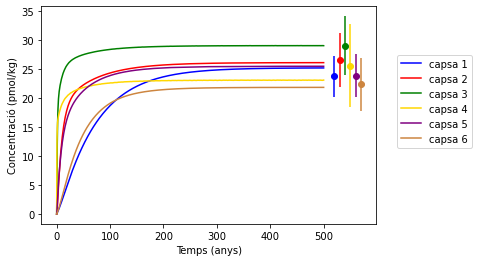

In [40]:
plt.plot(time, con_sol_1, label="capsa 1", color="blue")
plt.scatter(520, 23.76, color ="blue") #1
plt.errorbar(520, 23.76, yerr=(3.57), color="blue") #1

plt.plot(time, con_sol_2, label="capsa 2", color="red")
plt.scatter(530, 26.61, color="red") #2
plt.errorbar(530, 26.61, yerr=(4.7), color="red") #2
    
plt.plot(time, con_sol_3, label="capsa 3", color="green")
plt.scatter(540, 29.07, color="green") #3
plt.errorbar(540, 29.07, yerr=(5.06), color="green") #3
    
plt.plot(time, con_sol_4, label="capsa 4", color="gold")
plt.scatter (550, 25.61, color="gold") #4
plt.errorbar (550, 25.61, yerr=(7.19), color="gold") #4
    
plt.plot(time, con_sol_5, label="capsa 5", color="purple")
plt.scatter (560, 23.88, color="purple") #5
plt.errorbar(560, 23.88, yerr=(3.73), color="purple") #5 
    
plt.plot(time, con_sol_6, label="capsa 6", color="peru")
plt.scatter(570, 22.41, color="peru") #6
plt.errorbar (570, 22.410, yerr=(4.59), color="peru") #6
    
plt.legend(bbox_to_anchor=(1.3,0.8))
plt.xlabel("Temps (anys)")
plt.ylabel("Concentració (pmol/kg)")

(16.0, 35.0)

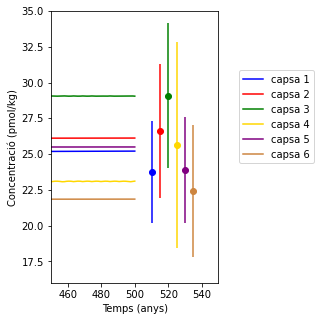

In [41]:
#Ampliació dels marges d'error

plt.figure(figsize=(3,5))
plt.plot(time, con_sol_1, label="capsa 1", color="blue")
plt.scatter(510, 23.76, color ="blue") #1
plt.errorbar(510, 23.76, yerr=(3.57), color="blue") #1

plt.plot(time, con_sol_2, label="capsa 2", color="red")
plt.scatter(515, 26.61, color="red") #2
plt.errorbar(515, 26.61, yerr=(4.7), color="red") #2
    
plt.plot(time, con_sol_3, label="capsa 3", color="green")
plt.scatter(520, 29.07, color="green") #3
plt.errorbar(520, 29.07, yerr=(5.06), color="green") #3
    
plt.plot(time, con_sol_4, label="capsa 4", color="gold")
plt.scatter (525, 25.61, color="gold") #4
plt.errorbar (525, 25.61, yerr=(7.19), color="gold") #4
    
plt.plot(time, con_sol_5, label="capsa 5", color="purple")
plt.scatter (530, 23.88, color="purple") #5
plt.errorbar(530, 23.88, yerr=(3.73), color="purple") #5 
    
plt.plot(time, con_sol_6, label="capsa 6", color="peru")
plt.scatter(535, 22.41, color="peru") #6
plt.errorbar (535, 22.410, yerr=(4.59), color="peru") #6
    
plt.legend(bbox_to_anchor=(1.6, 0.8))
plt.xlabel("Temps (anys)")
plt.ylabel("Concentració (pmol/kg)")
plt.xlim(450, 550)
plt.ylim(16, 35)

In [48]:
#Matriu per mirar les solucions:

rat_sol = [0, 0, 0, 0, 0, 0, 0]

rat_sol[1] = epsilon(solution.y[0][len(solution.y[0])-1],solution.y[1][len(solution.y[1])-1])
rat_sol[2] = epsilon(solution.y[2][len(solution.y[2])-1],solution.y[3][len(solution.y[3])-1])
rat_sol[3] = epsilon(solution.y[4][len(solution.y[4])-1],solution.y[5][len(solution.y[5])-1])
rat_sol[4] = epsilon(solution.y[6][len(solution.y[6])-1],solution.y[7][len(solution.y[7])-1])
rat_sol[5] = epsilon(solution.y[8][len(solution.y[8])-1],solution.y[9][len(solution.y[9])-1])
rat_sol[6] = epsilon(solution.y[10][len(solution.y[10])-1],solution.y[11][len(solution.y[11])-1])

c_sol = [0, 0, 0, 0, 0, 0, 0]

c_sol[1] = (solution.y[0][len(solution.y[0])-1] + solution.y[1][len(solution.y[1])-1])/1025
c_sol[2] = (solution.y[2][len(solution.y[0])-1] + solution.y[3][len(solution.y[1])-1])/1025
c_sol[3] = (solution.y[4][len(solution.y[0])-1] + solution.y[5][len(solution.y[1])-1])/1025
c_sol[4] = (solution.y[6][len(solution.y[0])-1] + solution.y[7][len(solution.y[1])-1])/1025
c_sol[5] = (solution.y[8][len(solution.y[0])-1] + solution.y[9][len(solution.y[1])-1])/1025
c_sol[6] = (solution.y[10][len(solution.y[0])-1] + solution.y[11][len(solution.y[1])-1])/1025

In [33]:
#Comparació entre els valors del model partint de 0 i els valors del model partint de l'equilibri (haurien de ser iguals):

In [34]:
rat_sol

NameError: name 'rat_sol' is not defined

In [ ]:
# Epsilon equilibri

 #-6.709116276354399,
 #-6.837459843775928,
 #-6.883056738614668,
 #-9.418734683641627,
 #-8.485396025819103,
 #-8.768217683960966


In [35]:
c_sol

NameError: name 'c_sol' is not defined

In [36]:
# Concentracions d'equilibri

 #25.205453485902293,
 #26.118052588744767,
 #29.04736107189415,
 #23.107394202389965,
 #25.49500191437809,
 #21.849920205806452